# Sprint Demo: Tract-Patch Search

In [1]:
# Client for Dask distributed computing
from dask.distributed import Client

# For reading the HATS catalogs and performing the cross-match
import lsdb

# For reading and working with skymaps for tract and patch searches
import lsst.skymap
import pickle

In [2]:
client = Client(n_workers=4, memory_limit="auto")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 116,Total memory: 512.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:23095,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 116
Started: Just now,Total memory: 512.20 GiB
Comm: tcp://127.0.0.1:6959,Total threads: 29
Dashboard: http://127.0.0.1:18111/status,Memory: 128.05 GiB
Nanny: tcp://127.0.0.1:20145,


## Load GAIA

In [3]:
gaia = lsdb.read_hats('https://data.lsdb.io/hats/gaia_dr3/gaia', margin_cache='https://data.lsdb.io/hats/gaia_dr3/gaia_10arcs')

In [33]:
gaia

,solution_id,designation,source_id,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pm,pmra,pmra_error,pmdec,pmdec_error,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag
npartitions=3933,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 2, Pixel: 0",int64[pyarrow],string[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]
"Order: 3, Pixel: 4",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 4, Pixel: 3067",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 3, Pixel: 767",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Reference: Cone Search

In [4]:
# from lsdb.core.search import ConeSearch

# cone_search = ConeSearch(ra=-60.3, dec=20.5, radius_arcsec=5 * 3600)

# gaia.plot_pixels(plot_title="Gaia DR3 Cone Search")
# cone_search.plot(fc="#00000000", ec="red")

## Reference: Polygon Search

In [5]:
# vertices = [(-60.5, 15.1), (-62.5, 18.5), (-65.2, 15.3), (-64.2, 12.1)]

# gaia_polygon = gaia.polygon_search(vertices)
# gaia_polygon

## Tract-Patch Search

In [6]:
# Load the LSST skymap.

lsst_skymap_path = "/sdf/home/o/olynn/LINCC/Skymaps/skyMap_lsst_cells_v1_skymaps.pickle"

with open(lsst_skymap_path, "rb") as f:
    lsst_skymap = pickle.load(f)
    print(lsst_skymap)

In [ ]:
# Get tract and patch numbers for a given RA and Dec.

ra_float = 42.0
dec_float = 2.0

longitude = lsst.geom.Angle(ra_float, lsst.geom.degrees)
latitude = lsst.geom.Angle(dec_float, lsst.geom.degrees)
sphere_point = lsst.geom.SpherePoint(longitude, latitude)

tract_patch_list = lsst_skymap.findTractPatchList([sphere_point])
tract_patch_list

tract_index = tract_patch_list[0][0]._id
patch_index = tract_patch_list[0][1][0]._sequentialIndex

print(f"Tract: {tract_index}, Patch: {patch_index}")

# TODO : Account for multiple tracts/patches (eg, ra: 42, dec: 3)

Tract: 9740, Patch: 32


In [58]:
gaia_tract_patch = gaia.tract_patch_search(
    tract=tract_index,
    patch=patch_index,
    skymap=lsst_skymap,
    fine=True,
)

In [59]:
gaia_tract_patch

,solution_id,designation,source_id,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pm,pmra,pmra_error,pmdec,pmdec_error,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag
npartitions=2,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 2, Pixel: 0",int64[pyarrow],string[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]
"Order: 2, Pixel: 69",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Gaia DR3 Tract and Patch Search'}>)

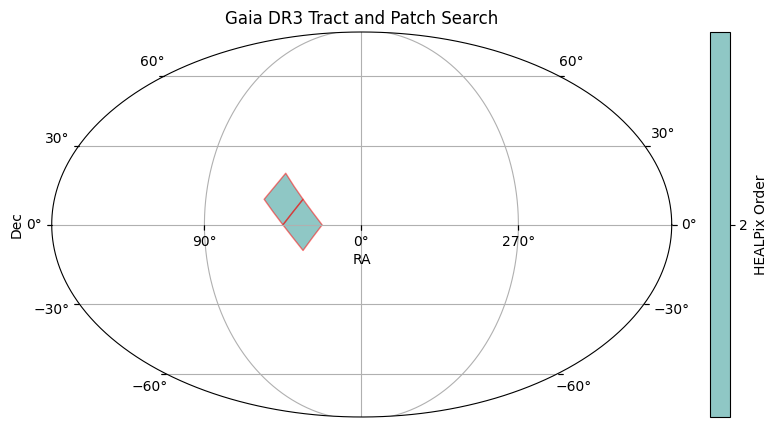

In [60]:
gaia_tract_patch.plot_pixels(
    plot_title="Gaia DR3 Tract and Patch Search",
    fc="#00000000",
    ec="red",
    alpha=0.5,
)

In [ ]:
# In progress: search within partition

gaia_tract_patch.compute()